# Part I - Loan Data Insights: Interest Rates and Borrower Behavior
## by Pratiti Soumya

## Introduction

For this project, I explored the **Loan Data from Prosper**, a peer-to-peer lending platform. The dataset contains information about more than 113,000 loan listings, with details on borrower characteristics, loan terms, credit scores, income levels, and repayment outcomes.

My goal was to understand what factors might influence the **interest rate** a borrower gets, and what might lead to a loan being **charged off** or **completed successfully**. I started by cleaning the data, dropping unnecessary columns, and dealing with missing values. Then I used different types of visualizations—histograms, box plots, scatter plots, heatmaps, and pair plots—to investigate both individual variables and relationships between them.

I focused especially on features like **Loan Status**, **Borrower Rate**, **Credit Score**, **Employment Status**, and **Income Range** to see how they relate to loan performance. Each section of the notebook uses visual exploration to raise questions, uncover patterns, and guide deeper investigation.


## Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df=pd.read_csv("prosperLoanData.csv")

In [3]:
df.shape

(113937, 81)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

After inspecting the dataset, I dropped the columns not necessary for my analysis:

In [5]:
columns_to_drop = [
    'ListingKey', 'ListingNumber', 'CreditGrade', 'ClosedDate', 'BorrowerAPR', 'LenderYield',
    'EstimatedEffectiveYield', 'EstimatedLoss', 'ProsperRating (numeric)', 'ListingCategory (numeric)',
    'BorrowerState', 'Occupation', 'EmploymentStatusDuration', 'IsBorrowerHomeowner',
    'CurrentlyInGroup', 'GroupKey', 'DateCreditPulled', 'FirstRecordedCreditLine',
    'CurrentCreditLines', 'OpenCreditLines', 'TotalCreditLinespast7years',
    'OpenRevolvingAccounts', 'OpenRevolvingMonthlyPayment', 'TotalInquiries',
    'CurrentDelinquencies', 'AmountDelinquent', 'PublicRecordsLast10Years',
    'PublicRecordsLast12Months', 'RevolvingCreditBalance', 'BankcardUtilization',
    'AvailableBankcardCredit', 'TotalTrades', 'TradesNeverDelinquent (percentage)',
    'TradesOpenedLast6Months', 'IncomeVerifiable', 'LoanKey', 'TotalProsperLoans',
    'TotalProsperPaymentsBilled', 'OnTimeProsperPayments', 'ProsperPaymentsLessThanOneMonthLate',
    'ProsperPaymentsOneMonthPlusLate', 'ProsperPrincipalBorrowed', 'ProsperPrincipalOutstanding',
    'ScorexChangeAtTimeOfListing', 'LoanCurrentDaysDelinquent', 'LoanFirstDefaultedCycleNumber',
    'LoanMonthsSinceOrigination', 'LoanNumber', 'LoanOriginationDate', 'LoanOriginationQuarter',
    'MemberKey', 'MonthlyLoanPayment', 'LP_CustomerPayments', 'LP_CustomerPrincipalPayments',
    'LP_InterestandFees', 'LP_ServiceFees', 'LP_CollectionFees', 'LP_GrossPrincipalLoss',
    'LP_NetPrincipalLoss', 'LP_NonPrincipalRecoverypayments', 'PercentFunded',
    'Recommendations', 'InvestmentFromFriendsCount', 'InvestmentFromFriendsAmount', 'Investors'
]


In [6]:
df.drop(columns=columns_to_drop, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingCreationDate      113937 non-null  object 
 1   Term                     113937 non-null  int64  
 2   LoanStatus               113937 non-null  object 
 3   BorrowerRate             113937 non-null  float64
 4   EstimatedReturn          84853 non-null   float64
 5   ProsperRating (Alpha)    84853 non-null   object 
 6   ProsperScore             84853 non-null   float64
 7   EmploymentStatus         111682 non-null  object 
 8   CreditScoreRangeLower    113346 non-null  float64
 9   CreditScoreRangeUpper    113346 non-null  float64
 10  InquiriesLast6Months     113240 non-null  float64
 11  DelinquenciesLast7Years  112947 non-null  float64
 12  DebtToIncomeRatio        105383 non-null  float64
 13  IncomeRange              113937 non-null  object 
 14  Stat

In [7]:
df.isnull().sum()

ListingCreationDate            0
Term                           0
LoanStatus                     0
BorrowerRate                   0
EstimatedReturn            29084
ProsperRating (Alpha)      29084
ProsperScore               29084
EmploymentStatus            2255
CreditScoreRangeLower        591
CreditScoreRangeUpper        591
InquiriesLast6Months         697
DelinquenciesLast7Years      990
DebtToIncomeRatio           8554
IncomeRange                    0
StatedMonthlyIncome            0
LoanOriginalAmount             0
dtype: int64

Some columns had very few missing values (less than 1–2%), such as:

- `EmploymentStatus`  
- `CreditScoreRangeLower`  
- `CreditScoreRangeUpper`  
- `InquiriesLast6Months`  
- `DelinquenciesLast7Years`

These features are useful for analysis, and since the number of missing rows was small, I chose to drop just the rows with missing values in these columns.


In [8]:
df.dropna(subset=['EmploymentStatus','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'InquiriesLast6Months','DelinquenciesLast7Years'],inplace=True)
df.isnull().sum()

ListingCreationDate            0
Term                           0
LoanStatus                     0
BorrowerRate                   0
EstimatedReturn            26741
ProsperRating (Alpha)      26741
ProsperScore               26741
EmploymentStatus               0
CreditScoreRangeLower          0
CreditScoreRangeUpper          0
InquiriesLast6Months           0
DelinquenciesLast7Years        0
DebtToIncomeRatio           8439
IncomeRange                    0
StatedMonthlyIncome            0
LoanOriginalAmount             0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 111594 entries, 0 to 113936
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   ListingCreationDate      111594 non-null  object 
 1   Term                     111594 non-null  int64  
 2   LoanStatus               111594 non-null  object 
 3   BorrowerRate             111594 non-null  float64
 4   EstimatedReturn          84853 non-null   float64
 5   ProsperRating (Alpha)    84853 non-null   object 
 6   ProsperScore             84853 non-null   float64
 7   EmploymentStatus         111594 non-null  object 
 8   CreditScoreRangeLower    111594 non-null  float64
 9   CreditScoreRangeUpper    111594 non-null  float64
 10  InquiriesLast6Months     111594 non-null  float64
 11  DelinquenciesLast7Years  111594 non-null  float64
 12  DebtToIncomeRatio        103155 non-null  float64
 13  IncomeRange              111594 non-null  object 
 14  StatedMon

To prepare for time-based analysis, I converted the `ListingCreationDate` column from `object` to `datetime` format using `pd.to_datetime()`. I added the `errors='coerce'` argument to safely handle any inconsistent entries without breaking the code.

In [10]:
df['ListingCreationDate'] = pd.to_datetime(df['ListingCreationDate'], errors='coerce')

In [12]:
# Save final subset with 'IncomeRange' cleaned
df_subset = df[df['IncomeRange'] != 'Not displayed']
df_subset.to_csv('prosperdata_final.csv', index=False)

### What is the structure of your dataset?

> Cleaned Dataset has 111594 rows and 16 columns. Each row represents a unique loan listing, and the columns include variables related to loan details, borrower characteristics, payment history, and credit scores.


### What is/are the main feature(s) of interest in your dataset?

> I’m most interested in exploring:

- **LoanStatus** – to see what factors lead to successful or failed loans.  
- **BorrowerRate** – to understand what affects the interest rate for a loan.  
- **EstimatedReturn** – to look at the expected return on loans from an investor’s point of view.  
- **DebtToIncomeRatio** – to explore how a borrower’s debt compares to their income.  
- **EmploymentStatus** and **IncomeRange** – to see how job and income levels relate to the loan’s outcome.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> To help me explore these topics, I’ll look at:

- **ProsperRating (Alpha)** and **ProsperScore** – to understand borrower risk levels.  
- **StatedMonthlyIncome** and **IncomeVerifiable** – to check if income details are related to interest rates or loan outcomes.  
- **CreditScoreRangeLower** and **CreditScoreRangeUpper** – to examine credit scores.  
- **LoanOriginalAmount** – to see how loan size connects with interest rates or status.  
- **Term** and **EmploymentStatus** – to understand loan conditions and borrower stability.  
- **DelinquenciesLast7Years** and **InquiriesLast6Months** – to get a sense of someone’s credit history and recent financial activity.

## Univariate Exploration

### **Question 1 : What is the overall distribution of loan statuses?**

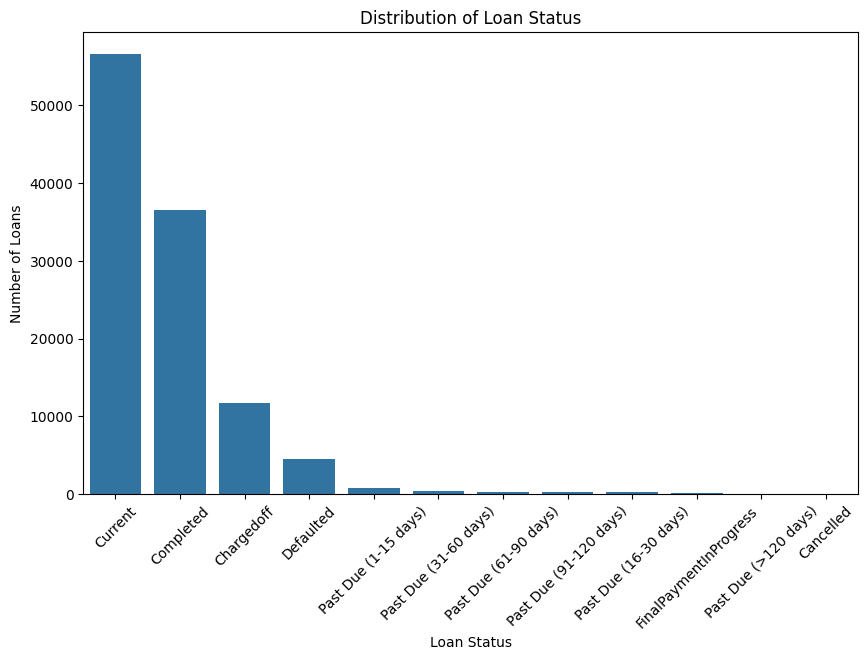

In [12]:
# Univariate count plot for LoanStatus
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='LoanStatus', order=df['LoanStatus'].value_counts().index)
plt.xticks(rotation=45)
plt.title('Distribution of Loan Status')
plt.xlabel('Loan Status')
plt.ylabel('Number of Loans');

### Observation:
Most loans are marked as **Current**, indicating they are still in repayment. The next most common category is **Completed**, meaning the borrower has repaid the loan in full.

A smaller portion of loans falls under **Chargedoff** and **Defaulted**, which indicate failed repayment. 
Other categories like **Past Due (1–15 days)** or **Cancelled** appear in much smaller quantities.

This distribution highlights that while most loans are in good standing, a notable percentage experience repayment issues.


### Question 2: What is the distribution of interest rates assigned to borrowers?

/tmp/ipykernel_13/2436430535.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels([f'{int(x*100)}%' for x in ax.get_xticks()]);


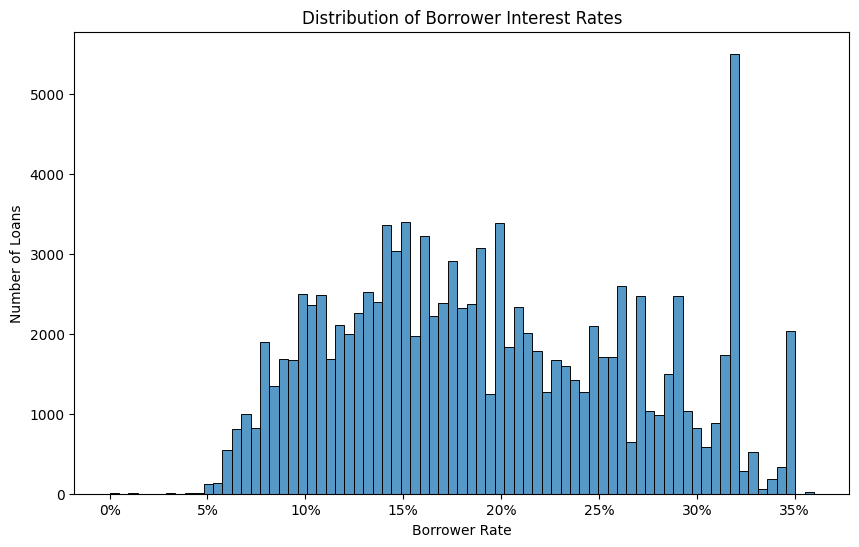

In [13]:
# Histogram for BorrowerRate
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='BorrowerRate')
plt.title('Distribution of Borrower Interest Rates')
plt.xlabel('Borrower Rate')
plt.ylabel('Number of Loans')
ax=plt.gca()
ax.set_xticklabels([f'{int(x*100)}%' for x in ax.get_xticks()]);

Most of the interest rates in dataset were between 10-20%. I also notice a big spike around 32%, which makes me think if that was a default max-rate for high risk borrowers. There are very few loans below 10%. Overall, most borrowers received moderately high interest rates.


### Question 3: How much money are borrowers typically requesting as loans?

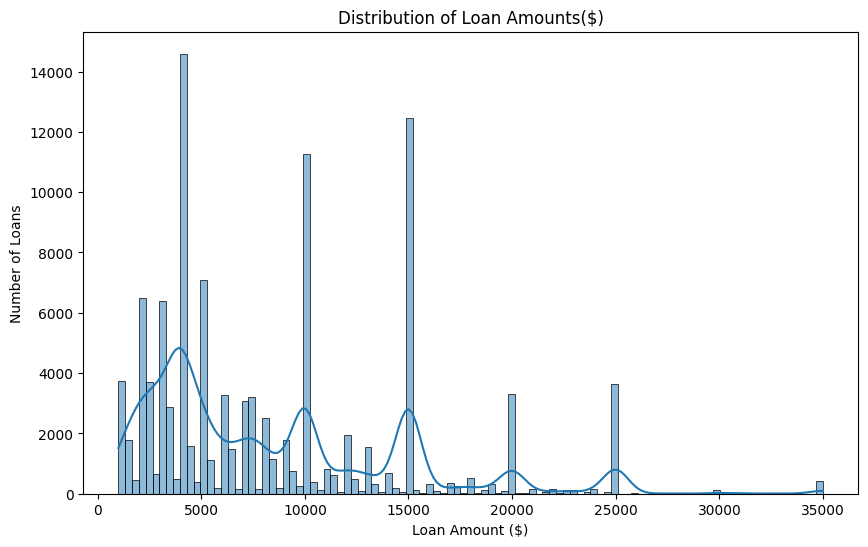

In [14]:
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='LoanOriginalAmount', kde=True)
plt.title('Distribution of Loan Amounts($)')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Number of Loans');

### Observation:
Most borrowers took loans from Prosper in the range of `$5,000 - $15,000`. I will use this variable later to analyze if loan amount affects interest rate or loan status.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I looked at three variables: `Loan Status`, `Borrower Rate`, and `Loan Amount`.

For `Loan Status`, most loans were marked as **“Current”* or *“Completed”**.  
A smaller portion of loans falls under **Chargedoff** and **Defaulted**, which indicate failed repayment. Other categories like **Past Due (1–15 days)** or **Cancelled** appear in much smaller count.
The **Borrower Rate (interest rate)** was mostly between 10% and 20%. But I noticed a big spike around 32%, which felt unusual. Maybe it's a default max rate for riskier borrowers?

Loan Amounts showed some clear peaks around values like $5,000 and $10,000. That made sense because people probably request round amounts. I didn’t see the need for any transformation here either.



### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

There were a few things that stood out:

* `Borrower Rate`: It had a big spike at 32%, which caught my attention. I didn’t change anything, but I plan to explore it more later.

* `Loan Status`: Some categories had very few values (e.g “Past Due” ), but I still kept them to see the full picture.

* `Loan Amount`: I didn’t change anything because the values were already easy to understand and useful.

So overall, I didn’t transform these variables because their original form made sense and helped me understand the data better.

## Bivariate Exploration

In [15]:
df.head()

,ListingCreationDate,Term,LoanStatus,BorrowerRate,EstimatedReturn,ProsperRating (Alpha),ProsperScore,EmploymentStatus,CreditScoreRangeLower,CreditScoreRangeUpper,InquiriesLast6Months,DelinquenciesLast7Years,DebtToIncomeRatio,IncomeRange,StatedMonthlyIncome,LoanOriginalAmount
0,2007-08-26 19:09:29.263,36,Completed,0.1580,NaN,NaN,NaN,Self-employed,640.0,659.0,3.0,4.0,0.17,"$25,000-49,999",3083.333333,9425
1,2014-02-27 08:28:07.900,36,Current,0.0920,0.05470,A,7.0,Employed,680.0,699.0,3.0,0.0,0.18,"$50,000-74,999",6125.000000,10000
2,2007-01-05 15:00:47.090,36,Completed,0.2750,NaN,NaN,NaN,Not available,480.0,499.0,0.0,0.0,0.06,Not displayed,2083.333333,3001
3,2012-10-22 11:02:35.010,36,Current,0.0974,0.06000,A,9.0,Employed,800.0,819.0,0.0,14.0,0.15,"$25,000-49,999",2875.000000,10000
4,2013-09-14 18:38:39.097,36,Current,0.2085,0.09066,D,4.0,Employed,680.0,699.0,1.0,0.0,0.26,"$100,000+",9583.333333,15000


In [16]:
df.isnull().sum()

ListingCreationDate          372
Term                           0
LoanStatus                     0
BorrowerRate                   0
EstimatedReturn            26741
ProsperRating (Alpha)      26741
ProsperScore               26741
EmploymentStatus               0
CreditScoreRangeLower          0
CreditScoreRangeUpper          0
InquiriesLast6Months           0
DelinquenciesLast7Years        0
DebtToIncomeRatio           8439
IncomeRange                    0
StatedMonthlyIncome            0
LoanOriginalAmount             0
dtype: int64

### Question 1: Is there a relationship between the interest rate a borrower gets and the Debt To Income Ratio?

In [17]:
df_subset=df[df['DebtToIncomeRatio']>0]

Text(0, 0.5, 'Debt To Income Ratio')

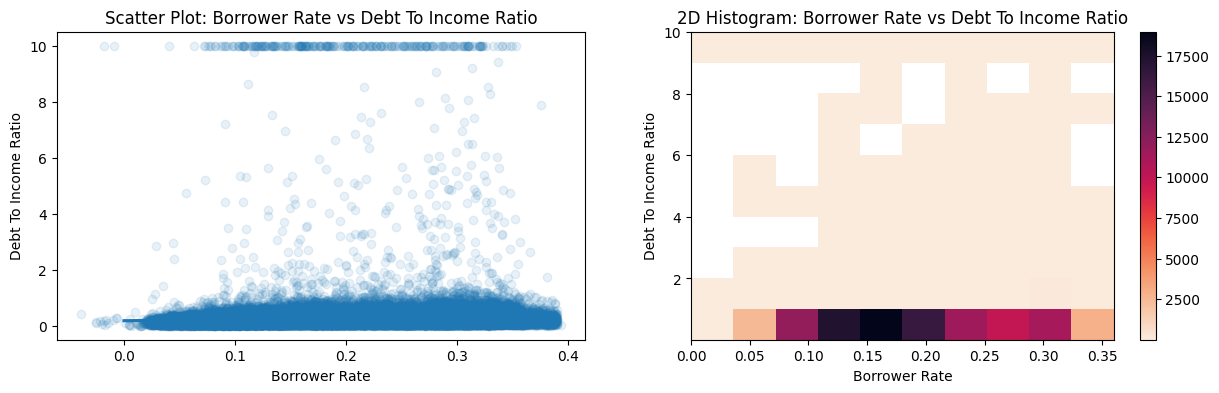

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Scatter plot with jitter and transparency
plt.subplot(1,2,1)
sns.regplot(data=df_subset, x='BorrowerRate', y='DebtToIncomeRatio', 
            x_jitter=0.04, scatter_kws={'alpha': 1/10}, ax=ax1)
ax1.set_title('Scatter Plot: Borrower Rate vs Debt To Income Ratio')
ax1.set_xlabel('Borrower Rate')
ax1.set_ylabel('Debt To Income Ratio')

# 2D Histogram
plt.subplot(1,2,2)
h=ax2.hist2d(data=df_subset, x='BorrowerRate', y='DebtToIncomeRatio', cmap='rocket_r', cmin=0.5)
plt.colorbar(h[3], ax=ax2)
ax2.set_title('2D Histogram: Borrower Rate vs Debt To Income Ratio')
ax2.set_xlabel('Borrower Rate')
ax2.set_ylabel('Debt To Income Ratio')


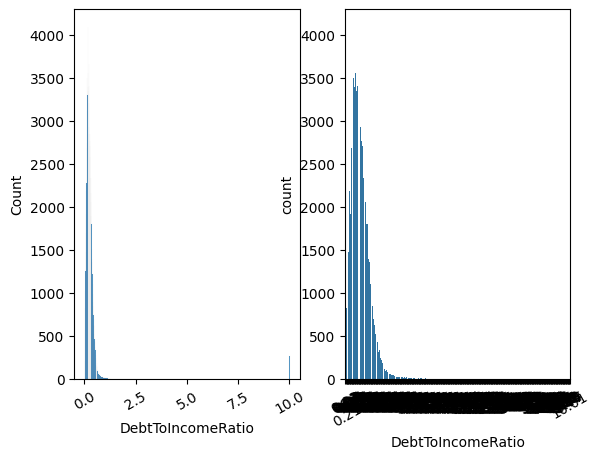

In [19]:
#Understanding what's going on with Debt to Income Ratio :
plt.subplot(1,2,1)
sns.histplot(data=df_subset, x='DebtToIncomeRatio')
plt.xticks(rotation=30)
plt.subplot(1,2,2)
sns.countplot(data=df_subset, x='DebtToIncomeRatio')
plt.xticks(rotation=30);

#### Remove high values from `DebtToIncomeRatio`

While exploring the `DebtToIncomeRatio` column, I noticed the values were extremely right-skewed. When I plotted a countplot, I could barely read the x-axis — most of the bars were crammed near zero, and the long tail of high values was stretching the entire scale.

From the chart, it became clear that **almost all borrowers had a ratio below 1.5**, with very few extreme values above that. These outliers were making it hard to visualize meaningful trends when comparing with other variables like `BorrowerRate`.

Since this small group of high-ratio borrowers was distorting the scale of my visualizations, I decided to **filter the dataset to only include rows with `DebtToIncomeRatio <= 1.5`**. This helped me focus on the typical borrower and made patterns in scatterplots and histograms much easier to see.

Text(0, 0.5, 'Debt-to-Income Ratio')

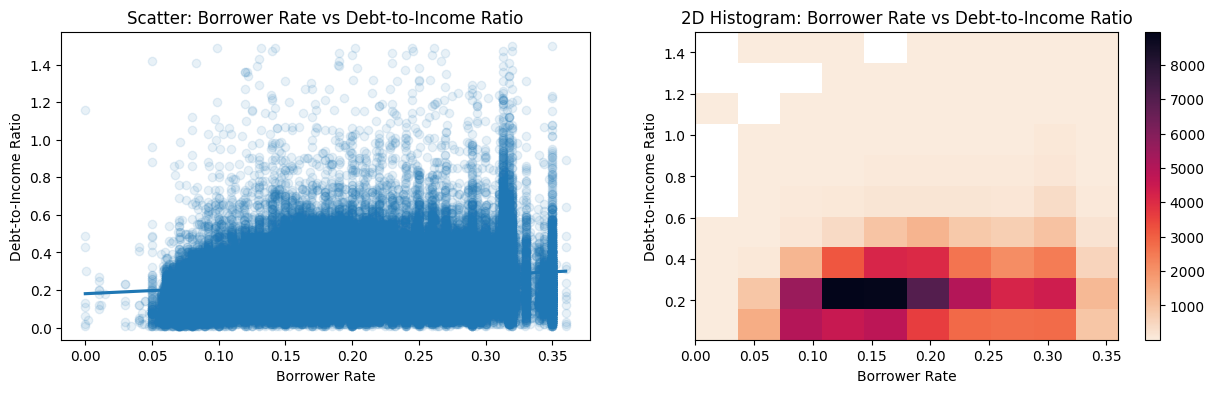

In [20]:
df_subset_clipped = df_subset[df_subset['DebtToIncomeRatio'] <= 1.5]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 4))

# Scatter plot
sns.regplot(data=df_subset_clipped, x='BorrowerRate', y='DebtToIncomeRatio',
            scatter_kws={'alpha': 1/10}, ax=ax1)
ax1.set_title('Scatter: Borrower Rate vs Debt-to-Income Ratio')
ax1.set_xlabel('Borrower Rate')
ax1.set_ylabel('Debt-to-Income Ratio')

# 2D Histogram
h = ax2.hist2d(data=df_subset_clipped, x='BorrowerRate', y='DebtToIncomeRatio', cmap='rocket_r',cmin=1)
plt.colorbar(h[3], ax=ax2)
ax2.set_title('2D Histogram: Borrower Rate vs Debt-to-Income Ratio')
ax2.set_xlabel('Borrower Rate')
ax2.set_ylabel('Debt-to-Income Ratio')


#### Observation:
From the scatter plot and 2D histogram, I noticed that most loans are concentrated around low debt-to-income ratios — especially below 0.5. I expected to see interest rates increasing with higher Debt to Income Ratios, but that wasn’t really the case. 

In fact, most loans — across all levels of interest rates — are clustered within a narrow band of low debt to income values. This suggests that debt-to-income ratio might not be a strong factor in determining the interest rate a borrower receives.



### Question 2: Is there a relationship between the interest rate a borrower gets and their employment status?

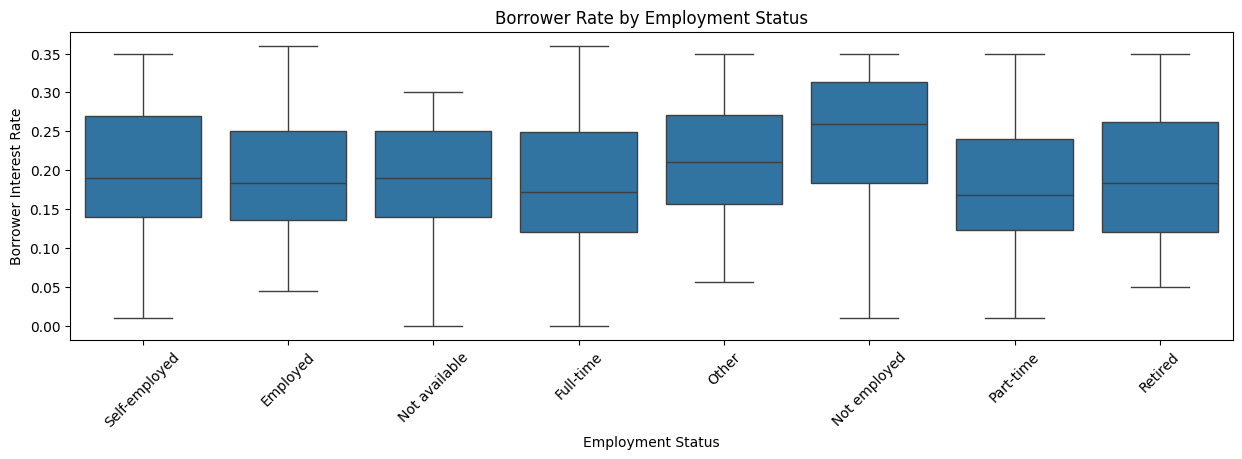

In [21]:
plt.figure(figsize=(15,4));
sns.boxplot(data=df, x='EmploymentStatus', y='BorrowerRate')
plt.title('Borrower Rate by Employment Status')
plt.xlabel('Employment Status')
plt.ylabel('Borrower Interest Rate')
plt.xticks(rotation=45);

Borrowers who are **Not Employed** generally receive the highest interest rates, with a clear upward shift in their rate distribution. This suggests lenders view unemployment as a higher risk.
People who are **Employed**, especially in Full-time roles, tend to get lower rates on average.

### Question 3: Does a borrower’s loan status vary across different income levels?

In [22]:
df_subset=df[df['IncomeRange']!='Not displayed']

Before creating the clustered bar chart comparing Loan Status and Income Range, I removed rows where Income Range was marked as "Not displayed." These entries don’t provide meaningful information for income-level analysis.


In [25]:
def plot_categorical_heatmap(df, row_var, col_var, cmap='viridis_r'):
    """
    Creates and displays a heatmap of counts between two categorical variables.

    Parameters:
    - df: pandas DataFrame
    - row_var: name of the row variable (string)
    - col_var: name of the column variable (string)
    - cmap: colormap to use for the heatmap (string, default='mako')
    """
    cross_tab = pd.crosstab(df[row_var], df[col_var])
    sns.heatmap(cross_tab, annot=True, fmt='d', cmap=cmap)
    plt.title(f'Heatmap of {row_var} by {col_var}')
    plt.xlabel(col_var)
    plt.ylabel(row_var)
    plt.show()


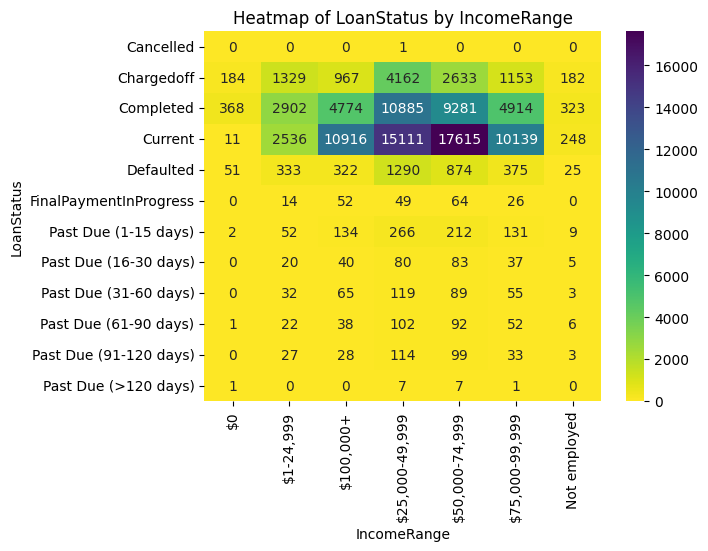

In [27]:
plot_categorical_heatmap(df_subset, 'LoanStatus', 'IncomeRange');

#cross_tab = pd.crosstab(df_subset['LoanStatus'], df_subset['IncomeRange'])

# Visualize with a heatmap
#sns.heatmap(cross_tab, annot=True, cmap='viridis_r', fmt='d')
#plt.title('Counts of Loan Status by Income Range')

#plt.xlabel('Income Range')
#plt.ylabel('# of Loans');

**Visualization:** I used a heatmap to show the cross-tabulated counts of `LoanStatus` by `IncomeRange`. To keep the chart clean and interpretable, I excluded entries where income was "Not displayed".

**Observation:** Most loans fall within the $25,000–74,999 income brackets, and these groups show the highest number of loans that are either `Current` or `Completed`. In contrast, lower-income ranges show slightly higher proportions of `Chargedoff` and `Default` statuses. This suggests to me that income level may influence loan repayment outcomes, with lower-income borrowers facing more challenges.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

For my first bivariate analysis, I looked at how **BorrowerRate** varied with **DebtToIncomeRatio** using a scatter plot and a 2D histogram. The distribution showed a wide spread of debt-to-income values across different interest rates, but I didn’t find any clear relationship — higher debt didn’t necessarily mean higher rates. 

In the second plot, I used a box plot to compare **BorrowerRate** across different **EmploymentStatus** categories. This visualization made it clear that unemployed borrowers tended to receive higher interest rates, while those who were employed full-time or part-time were more likely to get lower rates. This suggests employment stability might influence the rate offered.

The third visualization was a heatmap showing the relationship between **LoanStatus** and **IncomeRange**. Here, I noticed that borrowers with higher incomes (especially those earning above \$50,000) had more **Completed** and **Current** loans, while lower-income groups saw more **Chargeoff** and **Default**.  This suggests to me that income level may influence loan repayment outcomes, with lower-income borrowers facing more challenges.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Yes — while my focus was mainly on **BorrowerRate**, I found the **IncomeRange vs LoanStatus** heatmap particularly insightful. Even though **IncomeRange** wasn’t my original main feature, it showed strong patterns that could influence both loan approval and outcome.

I also noticed that **EmploymentStatus** might be useful for further analysis — categories like *Not employed* and *Self-employed* stood out as having different rate patterns and could be tied to higher risk.


## Multivariate Exploration

> Create plots of three or more variables to investigate your data even
further. Make sure that your investigations are justified, and follow from
your work in the previous sections.



### Question 1: Does employment status influence the relationship between borrower rate and loan amount?

Text(0.5, 1.05, 'Borrower Rate vs Loan Amount by Employment Status')

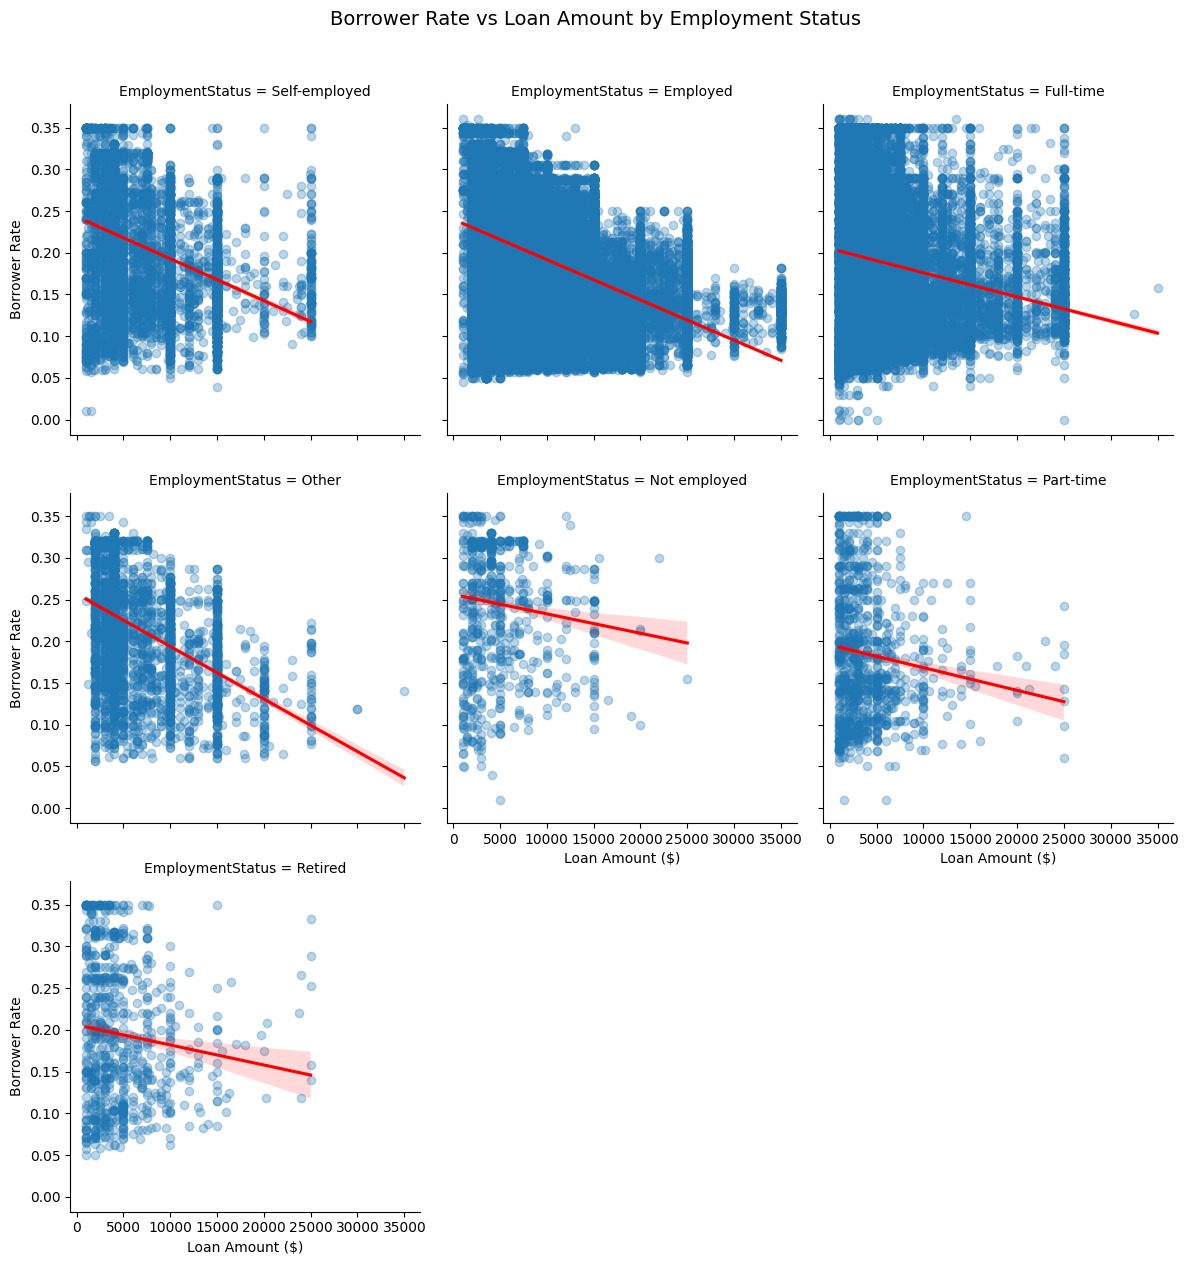

In [24]:
# Scatter plot with EmploymentStatus as hue
#plt.figure(figsize=(10, 6))
# FacetGrid with regression line using regplot
g = sns.FacetGrid(data=df_subset, col='EmploymentStatus', col_wrap=3, height=4)
g.map(sns.regplot, 'LoanOriginalAmount', 'BorrowerRate', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
g.set_axis_labels('Loan Amount ($)', 'Borrower Rate')
plt.suptitle('Borrower Rate vs Loan Amount by Employment Status', y=1.05, fontsize=14)

### Observation:
I created a FacetGrid scatter plot showing the relationship between loan amount and borrower rate, separated by employment status. Each subplot represents one employment category, allowing me to visually compare patterns across groups.
I noticed a few patterns:
- Across nearly all employment types, there's a **slight negative trend**: as loan amount increases, borrower rate tends to decrease.
- The trend is **most consistent and steep** among:
  - **Self-employed** and **Other** groups — the regression line is clearly sloped downward.
  - **Part-time** and **Not employed** also show a slight downward trend, but data is more dispersed.
- These results suggest that overall inverse relationship between loan size and borrower rate is present.

* Borrowers who are “Not employed” or “Part-time” appear to have a slightly wider range of borrower rates for similar loan amounts, hinting at less favorable or less consistent loan terms.Also, Loan Amounts tend to be lower for these categories.

* The “Retired” and “Self-employed” categories also show scattered borrower rates, but the sample size for those groups appears smaller.

* Overall, employment status does seem to influence how borrower rates affect loan amounts, with the least favorable category being "Not-Employed" or "Part-Time" for lenders and "Full-Time" and "Employed" being most favorable.

### Question 2: Are there any noticeable trends across BorrowerRate, CreditScoreRangeLower and StatedMonthlyIncome?

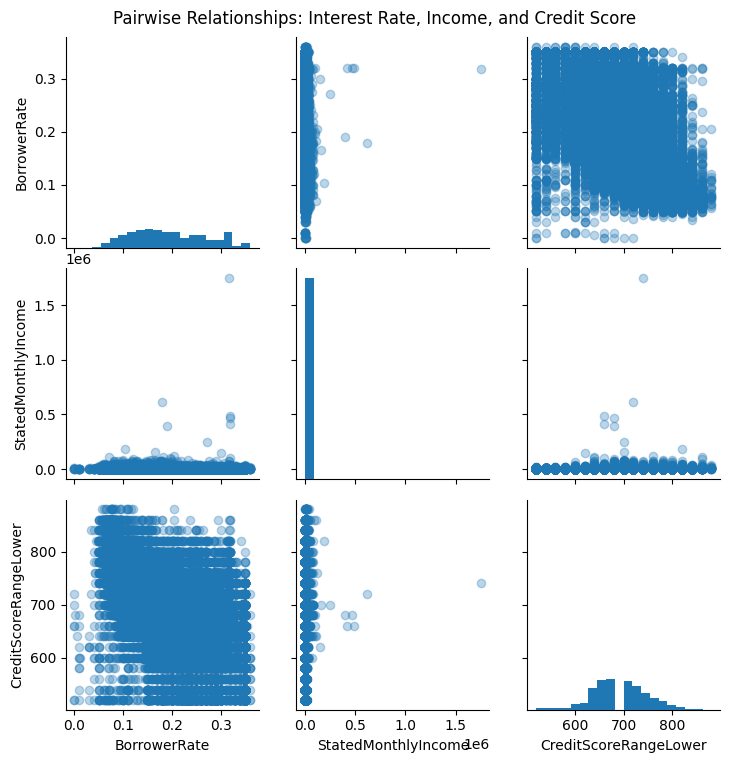

In [35]:
#Choose variables of interest
stats=['BorrowerRate', 'StatedMonthlyIncome','CreditScoreRangeLower']
#Create a paigrid with scatterplots off diagonal and histograms on the diagonal
g=sns.PairGrid(data=df_subset, vars=stats)
g.map_offdiag(plt.scatter, alpha=0.3)
g.map_diag(plt.hist, bins=20)
plt.suptitle('Pairwise Relationships: Interest Rate, Income, and Credit Score', y=1.01);

- BorrowerRate vs. CreditScoreRangeLower: A clear negative relationship. As expected, lower credit scores are associated with higher interest rates. 

- BorrowerRate vs. StatedMonthlyIncome: While higher incomes sometimes receive lower interest rates, the pattern is not as strong or consistent as with credit scores.

- CreditScoreRangeLower vs. StatedMonthlyIncome: higher income borrowers may have slightly better credit scores, but the correlation is not pronounced.

- Histograms on the diagonal show:

    - BorrowerRate is right-skewed with a spike near 32%.

    - Income is highly skewed with some extreme outliers.

- CreditScoreRangeLower is more normally distributed, clustered between 600 and 750.


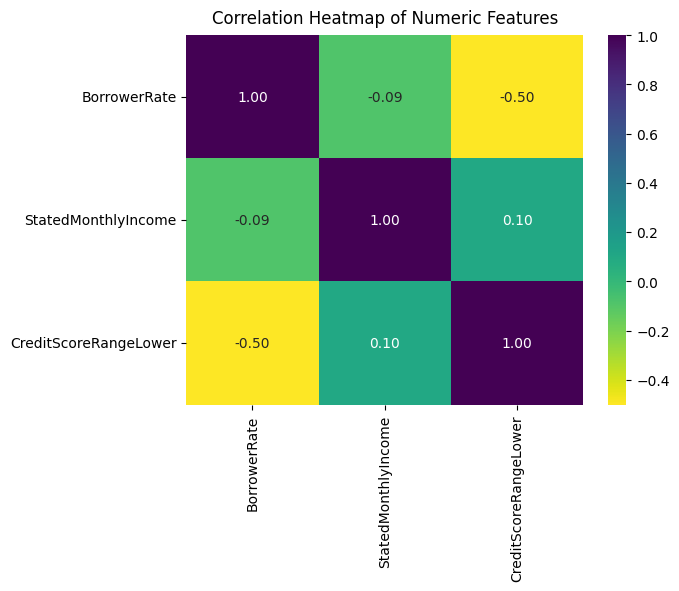

In [39]:
sns.heatmap(df_subset[stats].corr(), cmap='viridis_r', annot=True, fmt='0.2f')
plt.title('Correlation Heatmap of Numeric Features', y=1.01);

The heatmap shows that:

- Borrower Rate has a moderate negative correlation with Credit Score (-0.50), which suggests that borrowers with lower credit scores tend to receive higher interest rates — a clear sign of risk-based pricing.

- The relationship between Borrower Rate and Income is very weak (-0.09), indicating that income may not be a strong standalone predictor of interest rate.

- Credit Score and Income have a very weak positive correlation (0.10), showing only a minimal association.

Overall, the strongest insight here is the inverse relationship between credit score and borrower rate, which supports earlier trends seen in pair plots.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

### **Multivariate Exploration**

In this section, I focused on exploring how combinations of features interact, particularly how borrower rate relates to both loan amount and employment status. The facet plot by employment category helped me observe how different job types may affect both borrowing behavior and loan pricing. There was a general trend where higher loan amounts were associated with lower interest rates, especially for employed and full-time borrowers. The regression lines helped make these trends clearer.

Additionally, when I examined borrower rate, credit score, and income together using a pairplot and a heatmap, I noticed that lower credit scores tended to cluster around higher interest rates, confirming a moderate negative correlation (~ -0.50). This reinforced my understanding that credit score is a key driver of the rate charged.

### Were there any interesting or surprising interactions between features?

Yes — one unexpected finding was how little borrower rate correlated with income (only about -0.09). I initially assumed income would play a more direct role in determining interest rates, but the weak relationship suggests lenders may weigh other factors more heavily, like credit score and loan size. It was also interesting to see how employment status impacted loan distribution and pricing. Self-employed, unemployed, and part-time borrowers generally had higher rates and smaller loans, likely reflecting lending risk.

## Conclusions

- Most loans were either still being paid or had been fully paid off, which shows a lot of borrowers were in good standing.
- Borrower rates mostly fell between 10%–20%, with a big jump around 32%—maybe a max rate for high-risk loans.
- Most people borrowed between `$5,000 and $15,000`.
- Credit score had the strongest link to borrower rate—lower scores usually meant higher interest.
- Employment status also mattered. Full-time employed people seemed to get better rates and bigger loans.
- Income didn’t have much effect on the rate, which was unexpected.
- Overall, it looks like credit score and job status mattered most in how much people could borrow and what rate they got.

